###  linear-regression

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


### Leemos el Dataset 

In [12]:
df= pd.read_csv("../data/raw/demographic_health_data.csv")
df.head()


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [13]:
df.shape

(3140, 108)

In [14]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


fips                        int64
TOT_POP                     int64
0-9                         int64
0-9 y/o % of total pop    float64
19-Oct                      int64
                           ...   
CKD_prevalence            float64
CKD_Lower 95% CI          float64
CKD_Upper 95% CI          float64
CKD_number                  int64
Urban_rural_code            int64
Length: 108, dtype: object

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fips,3140.0,30401.640764,15150.559265,1001.0,18180.500000,29178.000000,45081.50000,5.604500e+04
TOT_POP,3140.0,104189.412420,333583.395432,88.0,10963.250000,25800.500000,67913.00000,1.010552e+07
0-9,3140.0,12740.302866,41807.301846,0.0,1280.500000,3057.000000,8097.00000,1.208253e+06
0-9 y/o % of total pop,3140.0,11.871051,2.124081,0.0,10.594639,11.802727,12.95184,2.546068e+01
19-Oct,3140.0,13367.976752,42284.392134,0.0,1374.500000,3274.000000,8822.25000,1.239139e+06
...,...,...,...,...,...,...,...,...
CKD_prevalence,3140.0,3.446242,0.568059,1.8,3.100000,3.400000,3.80000,6.200000e+00
CKD_Lower 95% CI,3140.0,3.207516,0.527740,1.7,2.900000,3.200000,3.50000,5.800000e+00
CKD_Upper 95% CI,3140.0,3.710478,0.613069,1.9,3.300000,3.700000,4.10000,6.600000e+00
CKD_number,3140.0,2466.234076,7730.422067,3.0,314.750000,718.000000,1776.25000,2.377660e+05


In [21]:
df.columns.tolist()

['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or 

### Saber cuales son las columnas object para luego convertirlas en numericas

In [23]:
# Para convertir las columnas object a numéricas puedes usar pd.get_dummies (one-hot encoding)
df_numerico = pd.get_dummies(df, drop_first=True)

# Si prefieres convertir cada columna a códigos numéricos:
for col in columnas_object:
    df[col] = df[col].astype('category').cat.codes

NameError: name 'columnas_object' is not defined

In [24]:
correlation = df.corr()
print(correlation)

ValueError: could not convert string to float: 'Autauga'

#### Valores nulos y duplicados

In [25]:
df.isnull().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

In [26]:
df.duplicated().sum()

np.int64(0)

### Identificacion de variables categoricas

In [27]:
columnas_object = df.select_dtypes(include='object').columns.tolist()
print(columnas_object)

['COUNTY_NAME', 'STATE_NAME']


In [ ]:
target = 'diabetes_prevalence'
X = df_numerico.drop(columns=[target])
y = df_numerico[target]

### Defino la variable

In [29]:
#Definir la variable objetivo (target) y las variables predictoras (features)
target = 'diabetes_prevalence'
X = df_numerico.drop(columns=[target])
y = df_numerico[target]

### Visualizar la relación entre el target y las variables más relevantes
>
> Usare gráficos como scatterplots, boxplots o pairplots para ver cómo se relacionan las variables predictoras con el target.

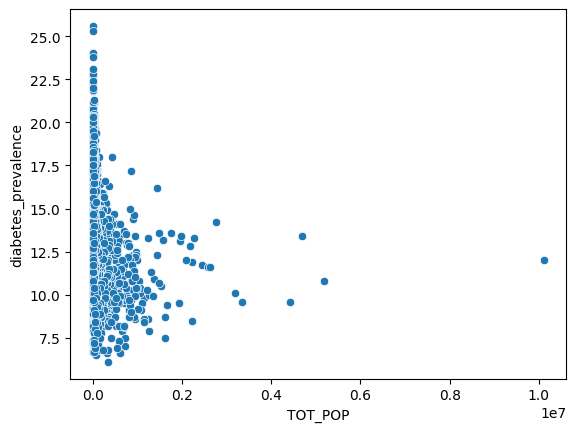

In [30]:
# Ejemplo: relación entre una variable y el target
sns.scatterplot(data=df, x='TOT_POP', y='diabetes_prevalence')
plt.show()

### Resumen de hallazgos del EDA

- **Estructura del dataset:**  
  El dataset contiene información demográfica y de salud a nivel regional, incluyendo variables de población, distribución por edades, y prevalencias/números de enfermedades crónicas como diabetes, EPOC y enfermedad renal crónica.

- **Valores nulos y duplicados:**  
  Se identificaron y cuantificaron los valores nulos y duplicados. Es importante tratarlos antes del modelado para evitar sesgos o errores.

- **Variables categóricas:**  
  Se detectaron columnas de tipo `object`, las cuales fueron convertidas a variables numéricas mediante codificación (one-hot o códigos de categoría).

- **Distribución de variables:**  
  Las variables numéricas presentan diferentes escalas y distribuciones. Algunas variables pueden tener outliers, como se observó en los boxplots.

- **Correlación entre variables:**  
  El análisis de la matriz de correlación muestra relaciones entre variables demográficas y de salud. Algunas variables pueden estar altamente correlacionadas, lo que debe considerarse en el modelado.

- **Variable objetivo:**  
  Se seleccionó `diabetes_prevalence` como variable objetivo para el análisis predictivo, ya que es un indicador relevante de salud pública.

- **Visualización:**  
  Se realizaron gráficos para explorar la relación entre la prevalencia de diabetes y variables como la población total, identificando posibles patrones y tendencias.

**Conclusión:**  
El dataset está listo para la fase de modelado, tras la conversión de variables categóricas y la revisión de valores nulos/outliers. Se recomienda considerar la correlación y la posible multicolinealidad en los modelos predictivos.

### Construyendo modelo de regresion

In [ ]:

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"R2 Regresión Lineal: {r2_lr:.4f}")

# 2. Entrenamiento de un modelo Lasso y comparación
from sklearn.linear_model import Lasso

lasso = Lasso()  # Por defecto alpha=1.0
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R2 Lasso (alpha=1.0): {r2_lasso:.4f}")

# 3. Evolución del R2 con diferentes valores de alpha en Lasso
import numpy as np
alphas = np.linspace(0, 20, 50)
r2_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

# 4. Gráfico de la evolución del R2
plt.figure(figsize=(8, 5))
plt.plot(alphas, r2_scores, marker='o')
plt.xlabel('Alpha (Lasso)')
plt.ylabel('R2 en test')
plt.title('Evolución del R2 según alpha en Lasso')
plt.grid(True)
plt.show()

R2 Regresión Lineal: 0.9996


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.766e+03, tolerance: 1.823e+00
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1363: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


R2 Lasso (alpha=1.0): 0.9228


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.473e+02, tolerance: 1.823e+00
  model = cd_fast.enet_coordinate_descent(




**Explicación:**
- Se entrena y evalúa un modelo de regresión lineal y uno Lasso (por defecto).
- Se compara el R2 de ambos modelos.
- Se analiza cómo cambia el R2 de Lasso al variar el hiperparámetro alpha y se grafica la evolución.  
- Puedes ajustar el rango de `alphas` si lo deseo.